In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 
import warnings
warnings.filterwarnings('ignore')

In [49]:
warnings.filterwarnings('ignore')
yfin.pdr_override()
df = web.get_data_yahoo('MST',  start='2010-01-01', end='2023-01-01')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,0.410,0.410,0.410,0.410,0.410,0
2010-01-05,0.410,0.410,0.410,0.410,0.410,0
2010-01-06,0.387,0.387,0.387,0.387,0.387,0
2010-01-07,0.404,0.404,0.404,0.404,0.404,0
2010-01-08,2.550,2.550,2.540,2.540,2.540,50254


In [50]:
df.shape

(2029, 6)

In [51]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2.029000e+03
mean,2021.877041,2071.156327,1983.733355,2035.198634,2035.198634,1.681204e+05
std,4222.866916,4321.904280,4143.337852,4247.708661,4247.708661,3.203386e+05
min,0.340000,0.340000,0.340000,0.340000,0.340000,0.000000e+00
25%,4.950000,4.990000,4.900000,4.940000,4.940000,1.000000e+03
50%,5.890000,5.900000,5.800000,5.900000,5.900000,4.350000e+04
75%,8.750000,8.800000,8.700000,8.790000,8.790000,2.290000e+05
max,16100.000000,16500.000000,15700.000000,16100.000000,16100.000000,4.822100e+06


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2029 entries, 2010-01-04 to 2020-01-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2029 non-null   float64
 1   High       2029 non-null   float64
 2   Low        2029 non-null   float64
 3   Close      2029 non-null   float64
 4   Adj Close  2029 non-null   float64
 5   Volume     2029 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 111.0 KB


<function matplotlib.pyplot.show(close=None, block=None)>

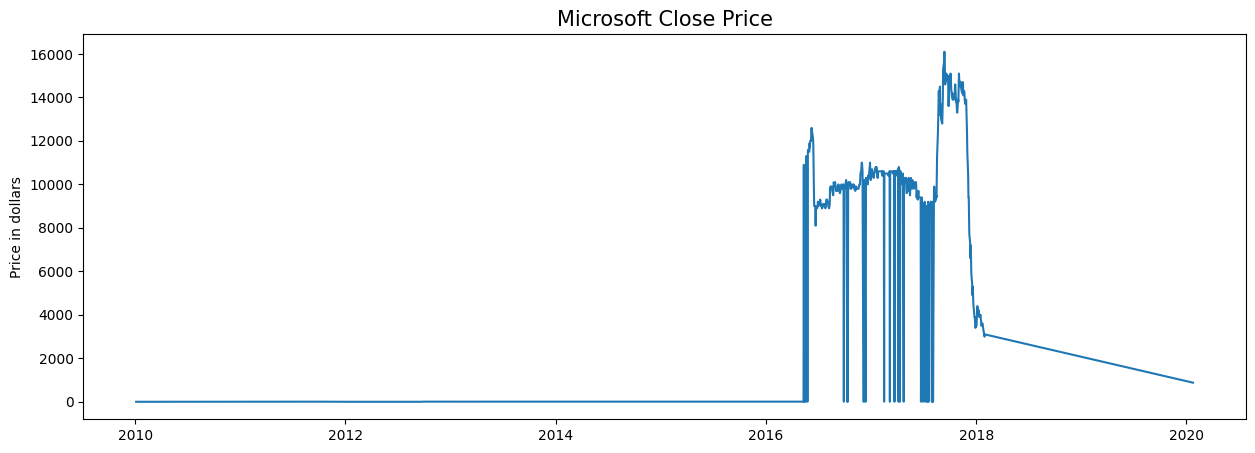

In [53]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Microsoft Close Price', fontsize=15)
plt.ylabel('Price in dollars')
plt.show

In [54]:
# If Close and Adj Close is equal , if yes we will delete de columm Adj Close
df[df['Close'] == df['Adj Close']].shape

(2029, 6)

In [55]:
df = df.drop(['Adj Close'], axis=1)

In [56]:
#see if is null on the data
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [65]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,0.410,0.410,0.410,0.410,0
2010-01-05,0.410,0.410,0.410,0.410,0
2010-01-06,0.387,0.387,0.387,0.387,0
2010-01-07,0.404,0.404,0.404,0.404,0
2010-01-08,2.550,2.550,2.540,2.540,50254


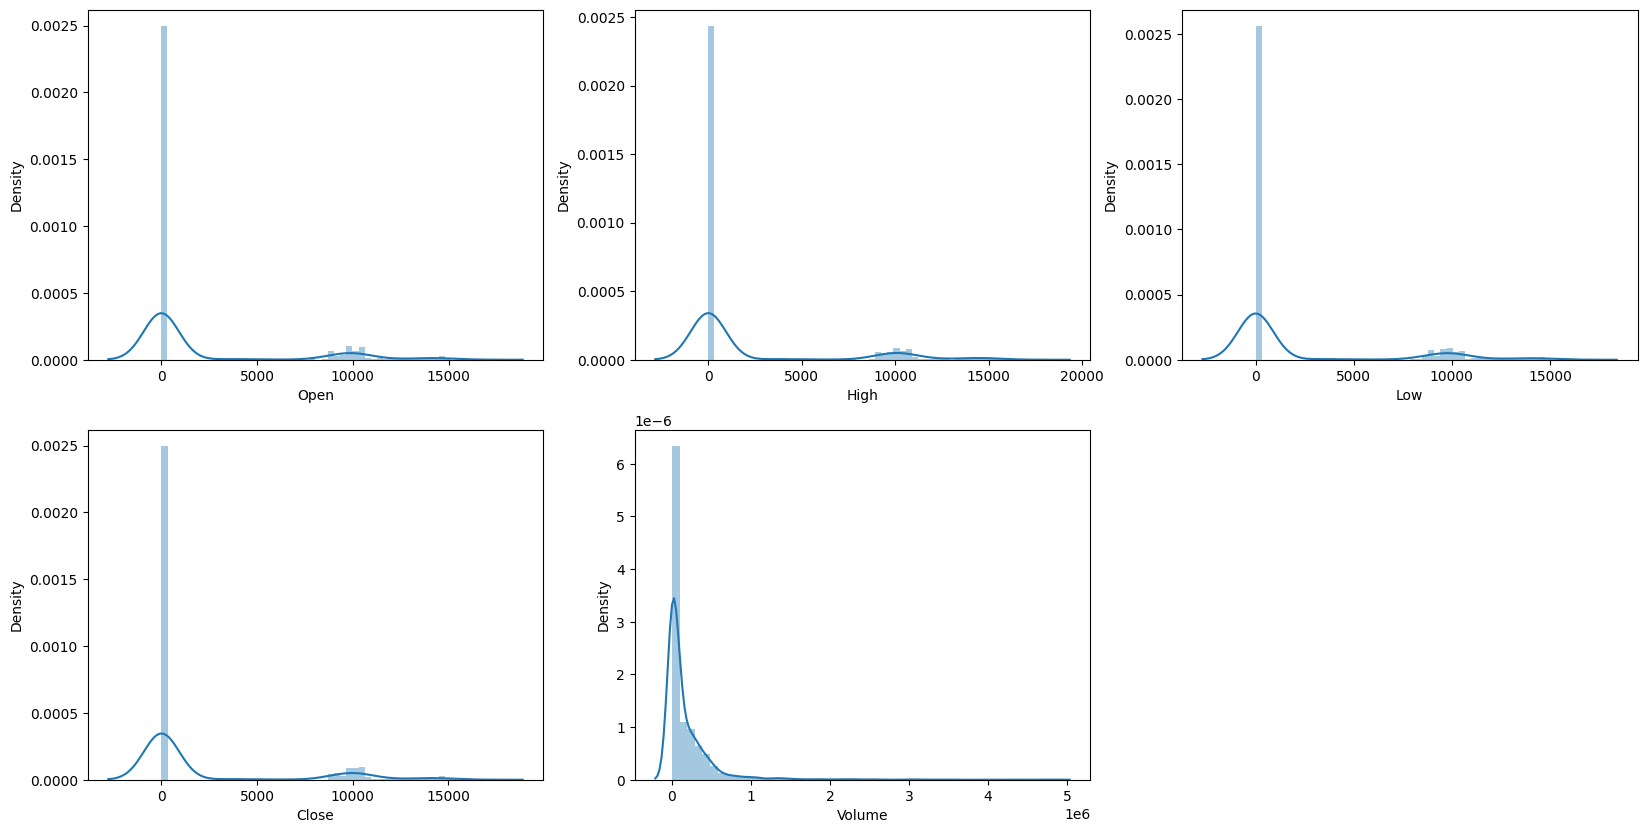

In [57]:
features = ['Open', 'High', 'Low','Close', 'Volume']
plt.subplots(figsize=(20,10))
for i , col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()

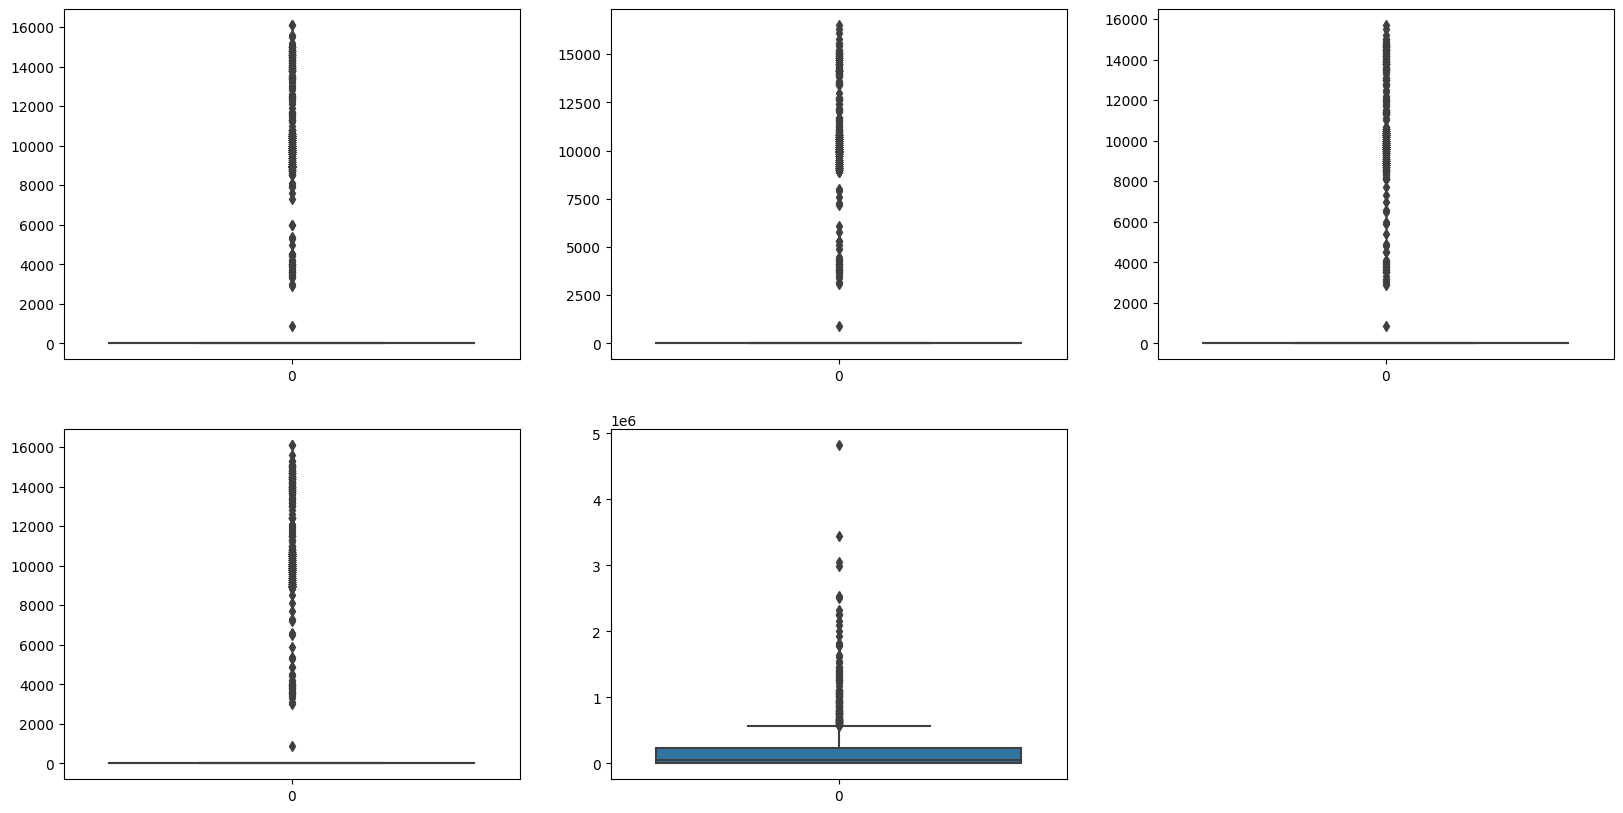

In [69]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i +1)
    sb.boxplot(df[col])
plt.show()



In [87]:
plitted = list(df.index)
print(plitted)



[Timestamp('2010-01-04 00:00:00'), Timestamp('2010-01-05 00:00:00'), Timestamp('2010-01-06 00:00:00'), Timestamp('2010-01-07 00:00:00'), Timestamp('2010-01-08 00:00:00'), Timestamp('2010-01-11 00:00:00'), Timestamp('2010-01-12 00:00:00'), Timestamp('2010-01-13 00:00:00'), Timestamp('2010-01-14 00:00:00'), Timestamp('2010-01-15 00:00:00'), Timestamp('2010-01-19 00:00:00'), Timestamp('2010-01-20 00:00:00'), Timestamp('2010-01-21 00:00:00'), Timestamp('2010-01-22 00:00:00'), Timestamp('2010-01-25 00:00:00'), Timestamp('2010-01-26 00:00:00'), Timestamp('2010-01-27 00:00:00'), Timestamp('2010-01-28 00:00:00'), Timestamp('2010-01-29 00:00:00'), Timestamp('2010-02-01 00:00:00'), Timestamp('2010-02-02 00:00:00'), Timestamp('2010-02-03 00:00:00'), Timestamp('2010-02-04 00:00:00'), Timestamp('2010-02-05 00:00:00'), Timestamp('2010-02-08 00:00:00'), Timestamp('2010-02-09 00:00:00'), Timestamp('2010-02-10 00:00:00'), Timestamp('2010-02-11 00:00:00'), Timestamp('2010-02-12 00:00:00'), Timestamp('20

In [89]:
df['day'] = [i.strftime('%d') for i in plitted]
df['month'] = [j.strftime('%m') for j in plitted]
df['year'] = [k.strftime("%Y") for k in plitted]
df.head()

,Open,High,Low,Close,Volume,day,month,year
Date,,,,,,,,
2010-01-04,0.410,0.410,0.410,0.410,0,04,01,2010
2010-01-05,0.410,0.410,0.410,0.410,0,05,01,2010
2010-01-06,0.387,0.387,0.387,0.387,0,06,01,2010
2010-01-07,0.404,0.404,0.404,0.404,0,07,01,2010
2010-01-08,2.550,2.550,2.540,2.540,50254,08,01,2010


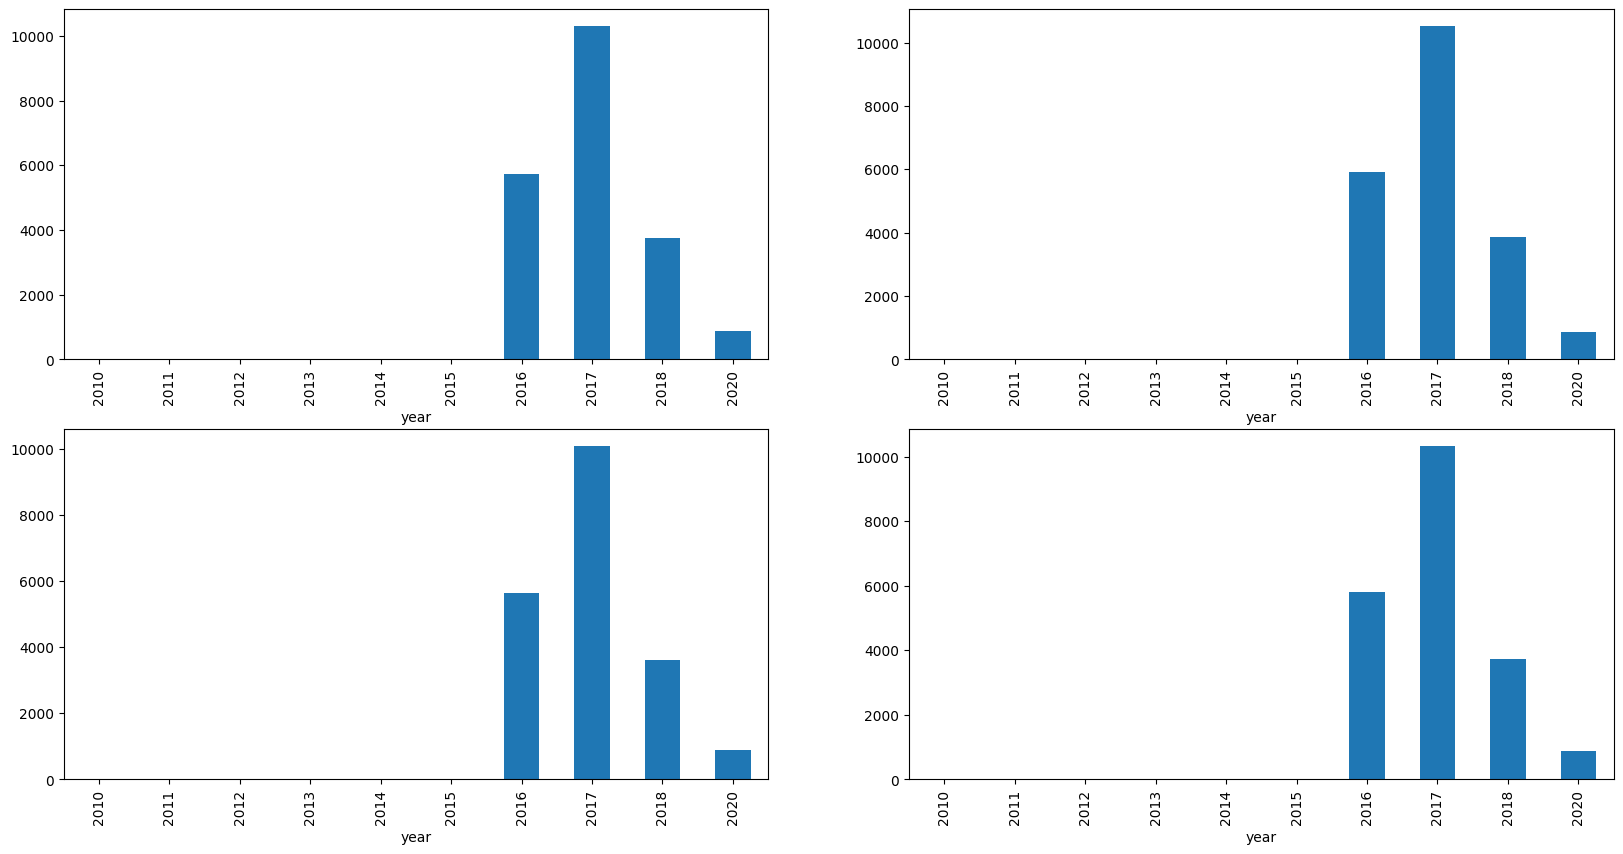

In [93]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [98]:
df['is_quarter_end'] = np.where(df['month'].astype('int')%3==0,1,0)
df.head()

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
Date,,,,,,,,,
2010-01-04,0.410,0.410,0.410,0.410,0,04,01,2010,0
2010-01-05,0.410,0.410,0.410,0.410,0,05,01,2010,0
2010-01-06,0.387,0.387,0.387,0.387,0,06,01,2010,0
2010-01-07,0.404,0.404,0.404,0.404,0,07,01,2010,0
2010-01-08,2.550,2.550,2.540,2.540,50254,08,01,2010,0


In [99]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume
is_quarter_end,,,,,
0,1985.361303,2030.175499,1951.434883,2000.937479,148447.863603
1,2094.317822,2152.455057,2047.807822,2103.166720,207147.125000


In [100]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1 , 0)

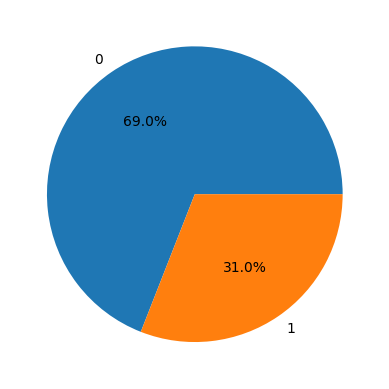

In [102]:
plt.pie(df['target'].value_counts().values, labels=[0,1], autopct='%1.1f%%')
plt.show()

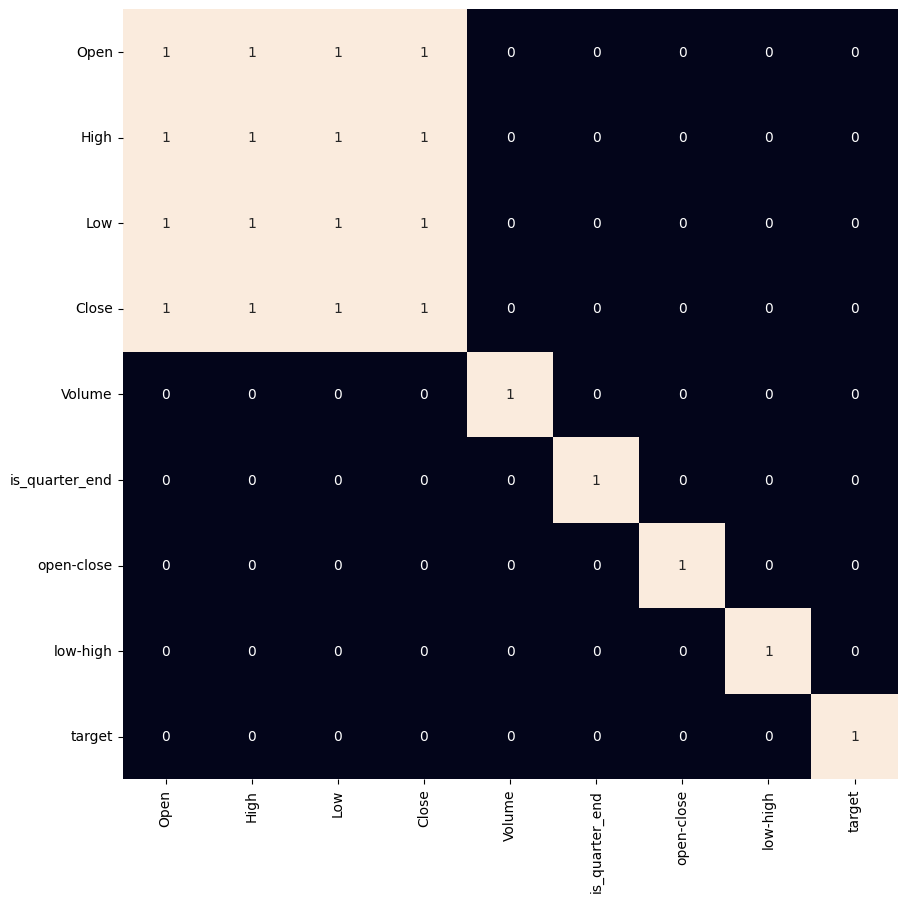

In [103]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr()> 0.9, annot=True, cbar=False )
plt.show()

In [105]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2023)
print(X_train.shape, X_valid.shape)

(1826, 3) (203, 3)


In [107]:
model = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]
for i in range(3):
    model[i].fit(X_train, Y_train)
    print(f'{model[i]} :')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, model[i].predict_proba(X_train)[:, 1]))
    print('Validation Accuracy:', metrics.roc_auc_score(Y_valid, model[i].predict_proba(X_valid)[:, 1]))
    print()

LogisticRegression() :
Training Accuracy :  0.5385184344676004
Validation Accuracy: 0.6008427614869545

SVC(kernel='poly', probability=True) :
Training Accuracy :  0.4407335964127068
Validation Accuracy: 0.47350496421149846

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) :
Training Accuracy :  

<function matplotlib.pyplot.show(close=None, block=None)>

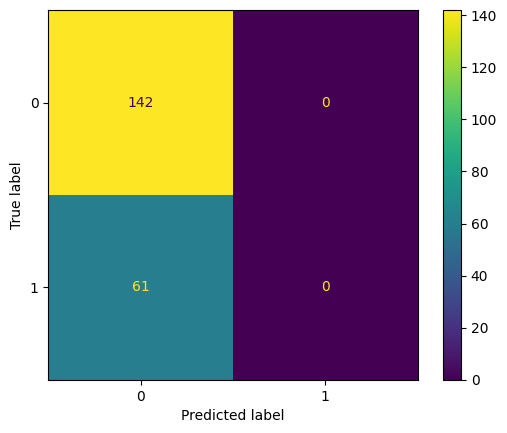

In [118]:
clf = SVC(random_state=0)
clf.fit(X_train, Y_train)
SVC(random_state=0)
predictions = clf.predict(X_valid)
cm = confusion_matrix(Y_valid, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show